# Price recommmendation - Simple linear regression
## Chapter 7
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 7 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#from sklearn import model_selection, metrics #To perform model cross validation and scoring
from sklearn.linear_model     import LinearRegression # To use Linear Regression Models
from sklearn.model_selection  import train_test_split # To split training/testing data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # To check how well our model is performing


The 'sale_price' dataset used in this example is synthetically generated and can be downloaded from the following resource: 

* Raw data used: https://github.com/paforme/predictiveanalytics/blob/main/Chapter7/Datasets/sale_price/prod.csv

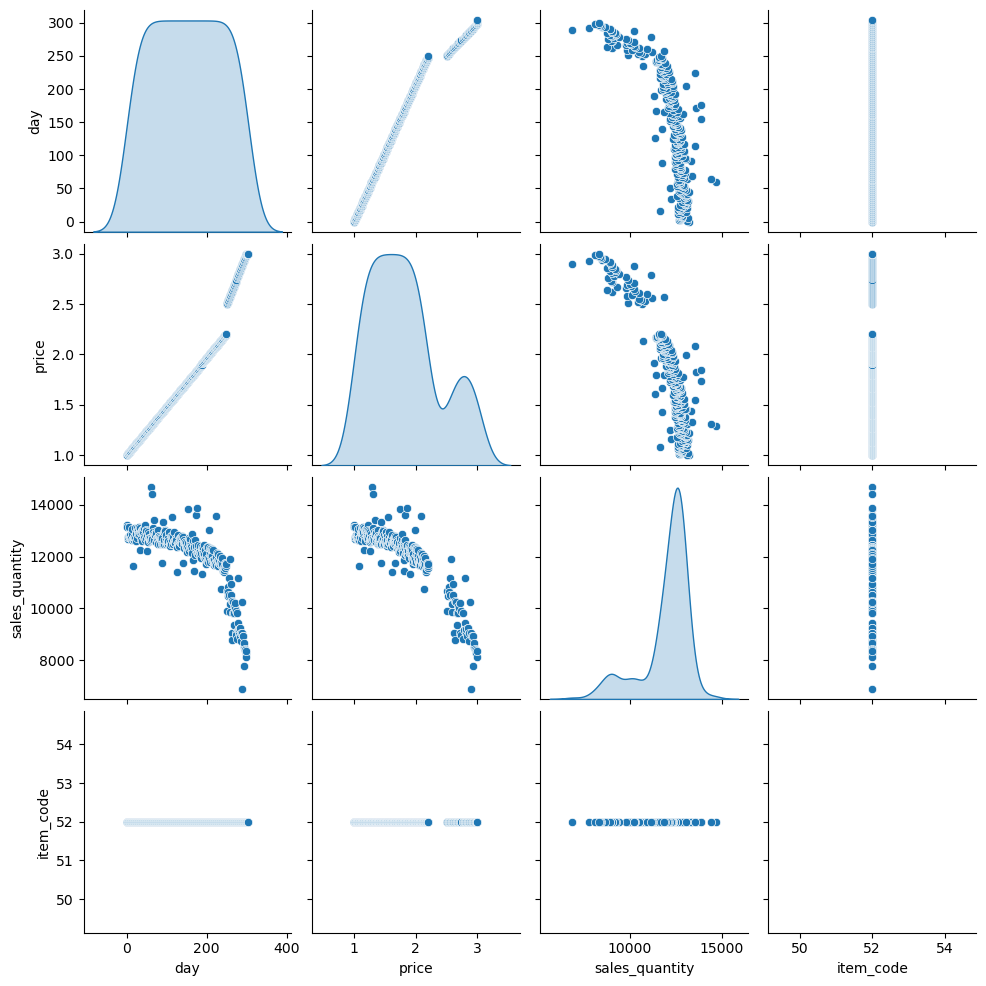

In [8]:
url = "./Datasets/sale_price/prod.csv" #Replace with where you download the data
sales = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
sales = sales.copy()
sales = sales[sales['item_code'] == 52] #Take data for itemcode 52
%matplotlib inline
sns.pairplot(sales, diag_kind='kde') #Plot the dataset

In [10]:
# Find rows with empty data including NaN and 0 values
rows_with_empty_data = sales[sales.isna().any(axis=1)]

print("Rows with empty data including NaN:")
print(rows_with_empty_data)

Rows with empty data including NaN:
     day  price  sales_quantity  item_code
300  300    3.0             NaN         52
301  301    3.0             NaN         52
302  302    3.0             NaN         52
303  303    3.0             NaN         52
304  304    3.0             NaN         52


In [14]:
#Remove rows with empty fields
sales = sales.dropna()
# Find rows with empty data including NaN and 0 values
rows_with_empty_data = sales[sales.isna().any(axis=1)]
print("Rows with empty data including NaN:")
print(rows_with_empty_data)

Rows with empty data including NaN:
Empty DataFrame
Columns: [day, price, sales_quantity, item_code]
Index: []


In [15]:
predictors = ['price'] #Feature
predicted = ['sales_quantity'] #Label

In [16]:
training_data, testing_data = train_test_split(sales, train_size=0.75, random_state=110) #Split the data

training_data = training_data.copy() #Create a copy of the data instead of referencing
testing_data = testing_data.copy() #Create a copy of the data instead of referencing


In [17]:
l_regression = LinearRegression() # Initialize the model

In [18]:
l_regression.fit(training_data[predictors], training_data[predicted]) # Training the model

LinearRegression()

In [19]:
predictions = l_regression.predict(testing_data[predictors]) #predictions on the test data
print(predictions)

[[12562.21100083]
 [13087.111566  ]
 [11673.91773669]
 [ 9937.70817496]
 [13389.93881514]
 [12319.94920152]
 [11249.95958789]
 [11855.61408617]
 [13066.92308272]
 [13470.69274824]
 [10462.60874013]
 [11754.67166979]
 [11734.48318651]
 [12118.06436876]
 [10341.47784048]
 [11714.29470324]
 [12017.12195238]
 [10058.83907461]
 [10422.23177358]
 [13490.88123152]
 [12824.66128341]
 [10563.55115651]
 [12077.6874022 ]
 [13026.54611617]
 [13531.25819807]
 [10301.10087392]
 [ 9796.38879203]
 [13369.75033186]
 [12925.60369979]
 [12865.03824997]
 [11835.42560289]
 [10139.59300772]
 [13430.31578169]
 [11472.03290393]
 [13228.43094893]
 [13470.69274824]
 [12420.8916179 ]
 [12037.31043565]
 [11310.52503772]
 [12743.90735031]
 [11512.40987048]
 [12501.645551  ]
 [12077.6874022 ]
 [ 9675.25789237]
 [ 9735.8233422 ]
 [12582.3994841 ]
 [13268.80791548]
 [11270.14807117]
 [10523.17418996]
 [13066.92308272]
 [ 9816.5772753 ]
 [12279.57223496]
 [13026.54611617]
 [12683.34190048]
 [12945.79218307]
 [11835.42

In [20]:
actual = testing_data[predicted] #Actual sales quantities for the testing data
print(actual)

     sales_quantity
111         12467.0
55          12867.0
201         12366.0
282          8909.0
24          12861.0
..              ...
181         12184.0
277          9140.0
94          12933.0
281          9190.0
228         11636.0

[75 rows x 1 columns]


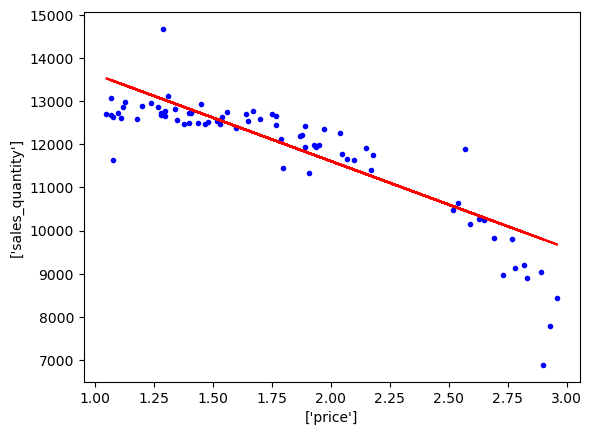

In [21]:
plt.scatter(testing_data[predictors], actual, color="blue", marker=".") # Plot the testing data 
plt.plot(testing_data[predictors], predictions, color="red") # Plot the predicted values using the predictions as the fitted line

plt.xlabel(predictors) #Label the X axis
plt.ylabel(predicted) #Label the Y axis

plt.show()

In [22]:
print(np.linspace(1, 3))

[1.         1.04081633 1.08163265 1.12244898 1.16326531 1.20408163
 1.24489796 1.28571429 1.32653061 1.36734694 1.40816327 1.44897959
 1.48979592 1.53061224 1.57142857 1.6122449  1.65306122 1.69387755
 1.73469388 1.7755102  1.81632653 1.85714286 1.89795918 1.93877551
 1.97959184 2.02040816 2.06122449 2.10204082 2.14285714 2.18367347
 2.2244898  2.26530612 2.30612245 2.34693878 2.3877551  2.42857143
 2.46938776 2.51020408 2.55102041 2.59183673 2.63265306 2.67346939
 2.71428571 2.75510204 2.79591837 2.83673469 2.87755102 2.91836735
 2.95918367 3.        ]


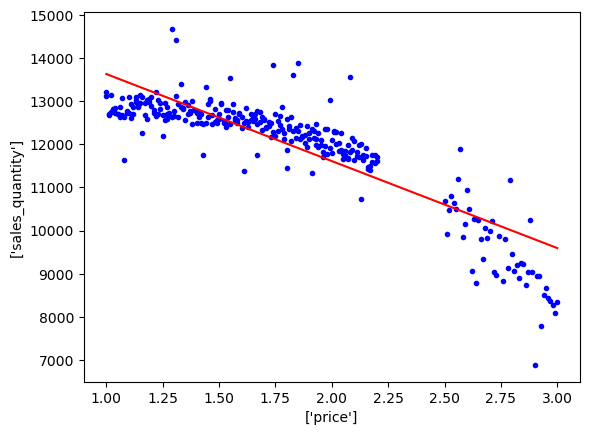

In [23]:
feature_range = np.linspace(1, 3) #generate points in range at equal intervals
feature_range = pd.DataFrame(feature_range,columns=['price']) #Convert points to a dataframe with price label
plt.plot(sales[predictors], sales[predicted], 'b.', feature_range[predictors], l_regression.predict(feature_range[predictors]), 'r') #Plot all sales data for item_id=52 and the prediction line using the generated features

plt.xlabel(predictors) #Label the x axis
plt.ylabel(predicted) #Label the y axis

plt.show()

In [24]:
r2 = r2_score(actual, predictions) #R-squared score
rmse = mean_squared_error(actual, predictions, squared=False) #Root Mean Squared Error
mae = mean_absolute_error(actual, predictions) #Mean Absolute Error

print("R-Squared: ",r2 )
print("RMSE: ",rmse) 
print("MAE: ",mae)  

R-Squared:  0.7559499163970949
RMSE:  699.5835213671531
MAE:  496.9973124296418
